In [40]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os

from rembg import remove
from PIL import Image

In [29]:
df_train = pd.read_csv('data/Training_set.csv')
df_train.head()


,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [30]:
def image_mover(folder, df):
    for label in df['label'].unique():
        os.makedirs(f'data/{folder}-set/{label}', exist_ok=True)
    
    for i in range(len(df)):
        filename = df.iloc[i]['filename']
        label = df.iloc[i]['label']

        src_path = f'data/{folder}/{filename}'
        dst_path = f'data/{folder}-set/{label}/{filename}'

        img = cv2.imread(src_path)
        if img is not None:
            cv2.imwrite(dst_path, img)

image_mover('train', df_train)

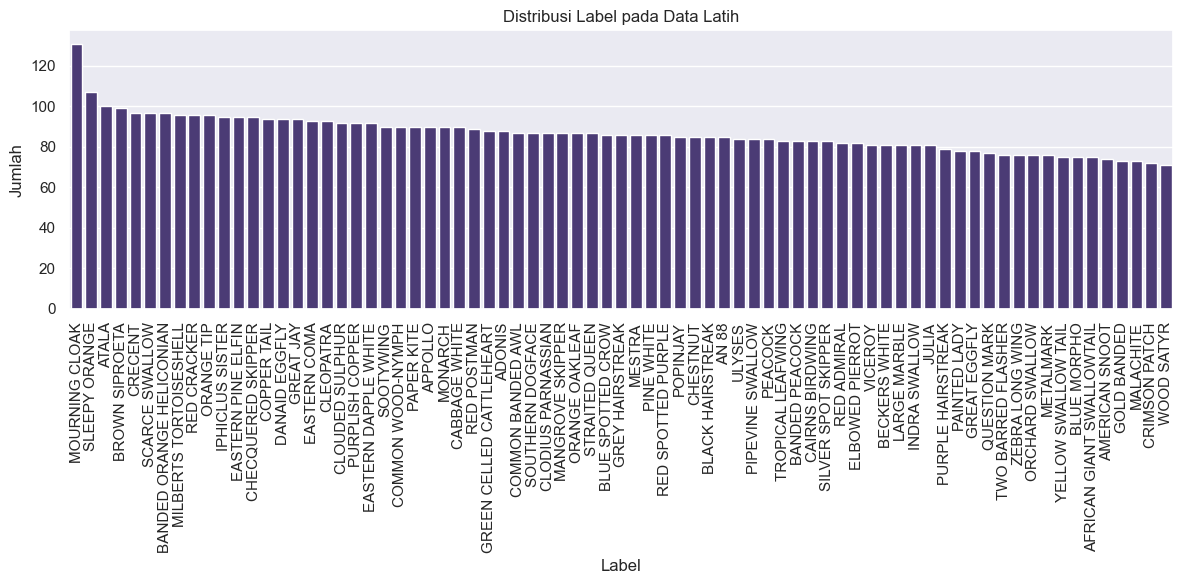

In [31]:
train_labels = df_train['label'].value_counts()

sns.set_theme(style='darkgrid')
sns.set_palette('viridis')
plt.figure(figsize=(12, 6))
sns.barplot(x=train_labels.index, y=train_labels.values)
plt.title('Distribusi Label pada Data Latih')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
labels = df_train['label'].unique()

rows, cols = 15, 5
plt.figure(figsize=(20, 60)) 

for i, label in enumerate(labels[:75]):
    label_folder = f'data/train-set/{label}'
    image_files = os.listdir(label_folder)
    img_path = os.path.join(label_folder, image_files[0])
    img = cv2.imread(img_path)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(label, fontsize=12, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
def apply_rembg_to_labeled_folder(input_root, output_root):
    for label in os.listdir(input_root):
        label_path = os.path.join(input_root, label)

        output_label_path = os.path.join(output_root, label)
        os.makedirs(output_label_path, exist_ok=True)

        for filename in os.listdir(label_path):
            input_path = os.path.join(label_path, filename)
            output_path = os.path.join(output_label_path, filename)

            try:
                with open(input_path, "rb") as inp_file:
                    input_data = inp_file.read()
                    output_data = remove(input_data)

                with open(output_path, "wb") as out_file:
                    out_file.write(output_data)

                print(f"Processed: {output_path}")
            except Exception as e:
                print(f"Error processing {input_path}: {e}")

apply_rembg_to_labeled_folder('data/train-set', 'data/masked-train-set')

100%|###############################################| 176M/176M [00:00<?, ?B/s]


Processed: data/masked-train-set\ADONIS\Image_1087.jpg
Processed: data/masked-train-set\ADONIS\Image_1131.jpg
Processed: data/masked-train-set\ADONIS\Image_1211.jpg
Processed: data/masked-train-set\ADONIS\Image_1565.jpg
Processed: data/masked-train-set\ADONIS\Image_1712.jpg
Processed: data/masked-train-set\ADONIS\Image_1772.jpg
Processed: data/masked-train-set\ADONIS\Image_1849.jpg
Processed: data/masked-train-set\ADONIS\Image_1858.jpg
Processed: data/masked-train-set\ADONIS\Image_1907.jpg
Processed: data/masked-train-set\ADONIS\Image_1927.jpg
Processed: data/masked-train-set\ADONIS\Image_1937.jpg
Processed: data/masked-train-set\ADONIS\Image_2.jpg
Processed: data/masked-train-set\ADONIS\Image_2101.jpg
Processed: data/masked-train-set\ADONIS\Image_2132.jpg
Processed: data/masked-train-set\ADONIS\Image_2203.jpg
Processed: data/masked-train-set\ADONIS\Image_2255.jpg
Processed: data/masked-train-set\ADONIS\Image_2275.jpg
Processed: data/masked-train-set\ADONIS\Image_2360.jpg
Processed: da